In [625]:
from math import log10

# read data
import pandas as pd
from dask.array import block
from statsmodels.miscmodels.tmodel import np_log

Xian_cohort = pd.read_csv('/Users/gengzhi/Desktop/Xian_cohort.csv')
nonXian_cohort = pd.read_csv('/Users/gengzhi/Desktop/nonXian_cohort.csv')
Xian_cohort = pd.concat([Xian_cohort,nonXian_cohort])

In [626]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2)
# only 69th column have missing value
Xian_cohort['CRP'] = imputer.fit_transform(Xian_cohort)[:,69]

In [627]:
Xian_cohort = Xian_cohort.drop(columns=['SSUM400'])
# surgical_classify delete 2 and 3
Xian_cohort = Xian_cohort[Xian_cohort['surgical_classify'] != 2]
Xian_cohort = Xian_cohort[Xian_cohort['surgical_classify'] != 3]
Xian_cohort = Xian_cohort.drop(columns=['surgical_classify', 'reappear'])
Xian_cohort = Xian_cohort[Xian_cohort['sex'] != 0]
Xian_cohort = Xian_cohort.drop(columns=['sex'])

In [618]:
factor = ['LYMPH','HbA1c']

In [619]:
# do COX regression
from lifelines import CoxPHFitter
# do single factor regression one by one
cph = CoxPHFitter()
cph.fit(Xian_cohort, duration_col='survival_time', event_col='death',formula= factor)

<lifelines.CoxPHFitter: fitted with 123 total observations, 113 right-censored observations>

In [620]:
cph.print_summary()

<lifelines.CoxPHFitter: fitted with 123 total observations, 113 right-censored observations>
             duration col = 'survival_time'
                event col = 'death'
      baseline estimation = breslow
   number of observations = 123
number of events observed = 10
   partial log-likelihood = -38.34
         time fit was run = 2024-11-05 05:58:49 UTC

---
           coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                  
LYMPH     -1.95      0.14      0.58           -3.09           -0.82                0.05                0.44
HbA1c      0.86      2.35      0.23            0.41            1.30                1.51                3.66

           cmp to     z      p  -log2(p)
covariate                               
LYMPH        0.00 -3.36 <0.005     10.34
HbA1c        0.00  3.79 <0.005     12.69
---
Concordance = 0.87
Partial AIC = 80.68
log-likelihood ratio test = 18.82 on 2 df
-log2(p) of ll-ratio test = 13.57

<Axes: xlabel='log(HR) (95% CI)'>

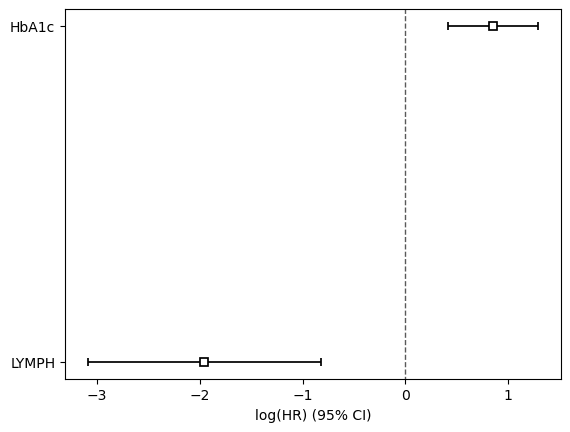

In [621]:
cph.plot()

In [622]:
from pynomo.nomographer import Nomographer
import numpy as np
import scipy.stats as stats
import math
LYMPH_params={
'u_min':0.000001,
'u_max':5,
'function':lambda u1:-1.95*u1,
'title':r'LYMPH',
'title_y_shift':0.7,
'tick_side':'left',
'tick_levels':2,
'tick_text_levels':2,
}
HbA1c_params={
'u_min':0.000001,
'u_max':13,
'function':lambda u2:0.86*u2,
'title':r'HbA1c',
'title_y_shift':0.7,
'tick_levels':2,
'tick_text_levels':2,
}
total_score_1_params={
'tag':'exitance',
'u_min':0.000001,
'u_max':10,
'function':lambda u3:-math.log10(u3),
'scale_type':'log',
'title':r'log scale total score',
'title_y_shift':0.7,
'tick_side':'right',
'tick_levels':2,
'tick_text_levels':2,
}
block_11_params={
'block_type':'type_1',
'width':10.0,
'height':10.0,
'f1_params':total_score_1_params,
'f2_params':HbA1c_params,
'f3_params':LYMPH_params,
}

In [623]:
total_score_2_params={
'tag':'exitance',
'u_min':0.000001,
'u_max':10,
'function':lambda u3:-math.log10(u3),
'scale_type':'log',
'title':r'',
'title_y_shift':0.7,
'tick_side':'left',
'tick_levels':2,
'tick_text_levels':2,
}
outcome_params={
'u_min':0.1,
'u_max':1,
'function':lambda u4:math.log(math.log((u4 / 0.032),math.e),10),
'title':r'outcome',
'title_y_shift':0.7,
'tick_side':'right',
'tick_levels':2,
'tick_text_levels':2,
} 
int_params={
'u_min':0,
'u_max':0,
'function':lambda u:u,
'title':r'$N$',
'title_y_shift':0.4,
'text_format':r"$3.0f$",
'tick_levels':2,
'tick_text_levels':1,
'scale_type':'manual point',
'manual_axis_data': {0:'connect me',
},
}
block_12_params={
'block_type':'type_1',
'width':10.0,
'height':10.0,
'f3_params':total_score_2_params,
'f2_params':outcome_params,
'f1_params':int_params
}

In [624]:
main_params={
'filename':'CompoundType1-Final.pdf',
'paper_height':20.0,
'paper_width':20.0,
'block_params':[block_11_params,block_12_params],
'transformations':[('rotate',0.01),('scale paper',)],
'title_x':8.5,
'title_y':-1,
'title_box_width':25.0,
'title_str':r'Nomogram',
'width':15.0,
}
Nomographer(main_params)